# Phase 1, Step A : We will collect stock price data.

In [2]:
import pandas as pd 
import yfinance as yf

First we will set Ticker for Stock.

In [3]:
ticker_symbol = "GOOGL"

We will create yfinance object for data of that company.

In [4]:
stock = yf.Ticker(ticker_symbol)

Now we want data of last two years and of each day so we will use period="2y" and interval="1d"

In [5]:
stock_data = stock.history(period="2y", interval="1d")

In [6]:
print(stock_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-06 00:00:00-04:00  135.209114  135.716068  132.873118  133.658417   
2023-09-07 00:00:00-04:00  132.793586  134.771728  132.157402  134.453629   
2023-09-08 00:00:00-04:00  134.105718  135.845285  134.046078  135.566956   
2023-09-11 00:00:00-04:00  135.726005  136.660404  134.980476  136.103745   
2023-09-12 00:00:00-04:00  135.447656  136.054020  134.384042  134.533142   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-09-06 00:00:00-04:00  18684500        0.0           0.0  
2023-09-07 00:00:00-04:00  18844300        0.0           0.0  
2023-09-08 00:00:00-04:00  23558300        0.0           0.0  
2023-09-11 00:00:00-04:00  20763400        0.0           0.0  
2023-09-12 00:00:00-04:00  18405500        0.0           0.0  


In [7]:
print(stock_data.sample(10))

                                 Open        High         Low       Close  \
Date                                                                        
2025-04-23 00:00:00-04:00  155.421851  157.339527  153.624024  155.162170   
2025-06-10 00:00:00-04:00  176.199997  181.110001  174.910004  178.600006   
2024-04-12 00:00:00-04:00  157.018328  159.264849  156.203209  156.789688   
2025-05-07 00:00:00-04:00  163.881601  164.800487  147.661232  151.196960   
2023-11-30 00:00:00-05:00  134.244880  134.741899  130.497351  131.739899   
2024-05-28 00:00:00-04:00  173.410002  176.213197  173.330477  175.348373   
2025-08-07 00:00:00-04:00  197.059998  197.539993  194.330002  196.520004   
2025-06-06 00:00:00-04:00  170.623441  174.289002  170.623441  173.469986   
2024-07-26 00:00:00-04:00  166.344202  167.279673  163.269102  166.194931   
2025-07-28 00:00:00-04:00  193.649994  194.050003  190.839996  192.580002   

                              Volume  Dividends  Stock Splits  
Date       

In [8]:
stock_data.shape

(502, 7)

In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-09-06 00:00:00-04:00 to 2025-09-05 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          502 non-null    float64
 1   High          502 non-null    float64
 2   Low           502 non-null    float64
 3   Close         502 non-null    float64
 4   Volume        502 non-null    int64  
 5   Dividends     502 non-null    float64
 6   Stock Splits  502 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.4 KB


In [10]:
stock_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [11]:
stock_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,502.000000,502.000000,502.000000,502.000000,5.020000e+02,502.000000,502.0
mean,163.448023,165.289027,161.745008,163.580683,3.070242e+07,0.002012,0.0
std,21.262249,21.562028,21.072003,21.386020,1.383093e+07,0.020083,0.0
min,122.147440,122.574876,119.493359,121.441673,1.024210e+07,0.000000,0.0
25%,145.067494,147.604761,143.860740,145.444801,2.186345e+07,0.000000,0.0
50%,164.392393,166.027342,162.605905,164.472298,2.704820e+07,0.000000,0.0
75%,176.610964,178.814999,174.738060,176.789932,3.476918e+07,0.000000,0.0
max,232.199997,235.759995,231.899994,235.000000,1.274901e+08,0.210000,0.0


In [12]:
stock_data.duplicated().sum()

np.int64(0)

In [13]:
stock_data.corr(numeric_only=True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.997258,0.996700,0.993894,0.050492,0.023899,NaN
High,0.997258,1.000000,0.996702,0.997199,0.071703,0.021898,NaN
Low,0.996700,0.996702,1.000000,0.997852,0.018152,0.020414,NaN
Close,0.993894,0.997199,0.997852,1.000000,0.040749,0.020256,NaN
Volume,0.050492,0.071703,0.018152,0.040749,1.000000,0.010515,NaN
Dividends,0.023899,0.021898,0.020414,0.020256,0.010515,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will drop stock split column because it has no relation with other columns

In [14]:
stock_data.drop(columns = ['Stock Splits'], inplace = True)

In [15]:
stock_data.head()

,Open,High,Low,Close,Volume,Dividends
Date,,,,,,
2023-09-06 00:00:00-04:00,135.209114,135.716068,132.873118,133.658417,18684500,0.0
2023-09-07 00:00:00-04:00,132.793586,134.771728,132.157402,134.453629,18844300,0.0
2023-09-08 00:00:00-04:00,134.105718,135.845285,134.046078,135.566956,23558300,0.0
2023-09-11 00:00:00-04:00,135.726005,136.660404,134.980476,136.103745,20763400,0.0
2023-09-12 00:00:00-04:00,135.447656,136.054020,134.384042,134.533142,18405500,0.0


# Phase 1, Step B: News Headlines Collection

Now we will collect past 1 month news headlines from google.

In [16]:
from newsapi import NewsApiClient

We will paste the Api key we got from newsapi.org

In [17]:
api_key = "f015f90d92974391bedd683a07a2158b"

We will initialize NewsAPI.

In [18]:
newsapi = NewsApiClient(api_key=api_key)

We want news related to Google also we want last 1 month data and for every request we can get only 100 articles max.

In [19]:
all_articles = newsapi.get_everything(q="Google OR Alphabet", language="en", sort_by="relevancy", page_size=100)

we will use all_articles dictionary and it has some key called articles having list of news articles. Each article is like dictionary in which there are keys like 'publishedAt', 'title', 'description'. We will take only two things date(published) and headline(new headline).

In [20]:
news_data = [] 
for article in all_articles['articles']:
    news_data.append({
        'date': article['publishedAt'],
        'headline': article['title']
    })

In [21]:
news_df = pd.DataFrame(news_data)

In [22]:
news_df.head()

,date,headline
0,2025-08-12T16:20:02Z,Perplexity Wants to Buy Google Chrome for $34....
1,2025-08-07T14:52:08Z,Google TV’s uncertain future
2,2025-08-26T13:36:50Z,Google is building a Duolingo rival into the T...
3,2025-08-12T16:50:26Z,Perplexity offers to buy Google Chrome for $34...
4,2025-08-22T12:49:40Z,Google made it easier to edit your Drive videos


In [23]:
news_df.describe()

,date,headline
count,100,100
unique,100,99
top,2025-08-12T16:20:02Z,Google Pixel 10 series: Your Ultimate Guide
freq,1,2


In [24]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      100 non-null    object
 1   headline  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


We can see the data type of date is object so we will change the data typr to dat time

In [25]:
news_df['date'] = pd.to_datetime(news_df['date'])

In [26]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      100 non-null    datetime64[ns, UTC]
 1   headline  100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 1.7+ KB


In [27]:
news_df.sample(15)

,date,headline
41,2025-08-26 15:13:01+00:00,Report: Apple Discussed Buying Mistral AI and ...
64,2025-08-20 22:01:23+00:00,Google Photos Gets Conversational Editing
93,2025-08-11 16:42:52+00:00,How many software updates will the Google Pixe...
9,2025-08-20 16:59:47+00:00,Gemini for Home is Google’s biggest smart home...
92,2025-08-20 15:07:30+00:00,Amazon’s next tablet might run Android
7,2025-08-06 17:31:47+00:00,Google swears it isn’t destroying the web with...
24,2025-08-20 15:37:37+00:00,The Google Pixel 10 and 10 Pro come with magne...
98,2025-08-22 17:04:00+00:00,Which Google Pixel 10 model should you buy?
29,2025-08-22 11:52:22+00:00,Google’s first Gemini smart home speaker detai...
73,2025-08-20 17:12:00+00:00,Best Google Pixel 10 Pro cases 2025


# Phase 2 : Data Ready

Step A: Volatility(if the stock has very high fluctuations then the volatility is very high otherwise it is low) checking

First we will calculate how much stock increases per day.
1. For that we will use *Log Returns*, because log returns (log(today/yesterday)) is better than simple percentage change (today-yesterday) / yesterday) because it is statistically better for time series analysisand it also normalizes data(i.e. a $10 stock 10% change is same as $1000 stock 10% change.)

2. Now we will calculate the standard deviation of log returns of N days. Standard deviation tells how much data is spread out from mean. If standard deviation is high then the stock is very volatile otherwise it is not.

In [28]:
import numpy as np 
# Volatility Calculation

# Log Returns
# we are taking log of today's close price and subtracting log of yesterday's(shift(1)) close price from it.
stock_data['log_return'] = np.log(stock_data['Close']) - np.log(stock_data['Close'].shift(1))

# Rolling Volatility
# we are taking standard deviation of log_return for last 7 days(window = 7).
stock_data['volatility'] = stock_data['log_return'].rolling(window=7).std()

In [29]:
# For thw first row there is no previous day so log_return will be NaN.
# For first 6 rows there is no 7 previous days so volatility will be NaN.
# We will remove these rows.
stock_data.dropna(inplace=True)

In [30]:
print("Stock Data with Volatility:")
print(stock_data[['Close', 'log_return', 'volatility']].head())

Stock Data with Volatility:
                                Close  log_return  volatility
Date                                                         
2023-09-15 00:00:00-04:00  136.580887   -0.005082    0.008330
2023-09-18 00:00:00-04:00  137.386063    0.005878    0.008327
2023-09-19 00:00:00-04:00  137.217056   -0.001231    0.008115
2023-09-20 00:00:00-04:00  132.942703   -0.031646    0.014849
2023-09-21 00:00:00-04:00  129.662384   -0.024984    0.016818


Step B: We want to give a number to every headline news so that we can tell how much it is positive or negative.
For this we will use VADER(Valence Aware Dictionary and Sentiment Reasoner) library.
1. It also reads punctutaion i.e. it will read "Google's new phone is amazing!!" more positively then "Google's new phone is amazing".
2. It also reads capitalization i.e. it will read "The company faces HUGE losses" more negatively then "The company faces huge losses".
3. It also reads "but" type words.

VADER gives us 4 type of scores : positive, negative, neutral and compound. We will use compound score. It will be between -1(extreme negative) se +1(extreme positive).

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Now we will create a function that will give compound score of every headline.

In [32]:
def get_vader_score(text):
    # polarity_scores function returns a dictionary with negative, neutral, positive, and compound scores.
    # We are interested in the compound score which is a normalized score between -1 (most negative) and +1 (most positive).
    score = analyzer.polarity_scores(text)['compound']
    return score

In [33]:
# Applying the function to the 'headline' column to get sentiment scores.
news_df['sentiment_score'] = news_df['headline'].apply(get_vader_score)

In [34]:
print("\nNews Data with Sentiment Score:")
print(news_df[['headline', 'sentiment_score']].head())


News Data with Sentiment Score:
                                            headline  sentiment_score
0  Perplexity Wants to Buy Google Chrome for $34....           0.0000
1                       Google TV’s uncertain future          -0.2960
2  Google is building a Duolingo rival into the T...           0.0000
3  Perplexity offers to buy Google Chrome for $34...           0.0000
4    Google made it easier to edit your Drive videos           0.4215


# Phase 3 : We will merge data.

Now we have two different tables stock_data and new_df. We have to bring these data in one table so that we can compare how sentiment and volatility related.

We will use *"average sentiment score"*, like we will use 10 different news headlines.

1. Group and Aggregate : We will create group of news_df according to date. Then for each date we will calculate average(mean) of sentiment_score. We will get final sentiment score of each days.

2. Then we will merge new daily_sentiment table with stock_data on the basis of date.

In [35]:
# Data Merging
# Step1 : We will calculate average sentiment score for each date.
# .groupby('date') will group the data according to date.
# .mean() will calculate mean of sentiment_score for each date.
# .reset_index() will reset the index of the new dataframe.

daily_sentiment = news_df.groupby('date')['sentiment_score'].mean().reset_index() 

In [36]:
print("Daily Average Sentiment Scores:")
print(daily_sentiment.head())

Daily Average Sentiment Scores:
                       date  sentiment_score
0 2025-08-05 13:23:33+00:00           0.0000
1 2025-08-05 15:54:22+00:00           0.4019
2 2025-08-05 23:48:06+00:00           0.0000
3 2025-08-06 17:31:47+00:00          -0.5267
4 2025-08-07 14:52:08+00:00          -0.2960


In [37]:
# Step 2 : We will merge daily_sentiment with stock_data on the basis of date.
# First we will reset stock_data index so that it becomes normal column.
stock_data.reset_index(inplace=True)

# 'date' column in daily_sentiment and stock_data should be of same type.
stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.date

# daily_sentiment['date'] is already in datetime format but it has time also. We will convert it to date only.
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date']).dt.date

# Merging
# left_on and right_on specify the columns to join on from the left and right DataFrames respectively.
# how='left' means we want to keep all rows from stock_data and only matching rows from daily_sentiment.
merged_data = pd.merge(stock_data, daily_sentiment, left_on='Date', right_on='date', how='left')

# After merging, we don't need the 'date' column from daily_sentiment anymore.
# Also, there might be some dates in stock_data for which there are no news headlines,
merged_data.drop(columns=['date'], inplace=True)

# so the sentiment_score for those dates will be NaN. We can fill those NaN values with 0 (neutral sentiment).
merged_data['sentiment_score'].fillna(0, inplace=True)

print("\n--- Final Merged Data ---")
print(merged_data[['Date', 'Close', 'volatility', 'sentiment_score']].sample(10))


--- Final Merged Data ---
           Date       Close  volatility  sentiment_score
139  2024-04-05  151.590851    0.017813              0.0
151  2024-04-23  157.316513    0.012350              0.0
332  2025-01-13  190.559570    0.013320              0.0
188  2024-06-14  175.937744    0.010532              0.0
19   2023-10-12  138.141525    0.012521              0.0
308  2024-12-05  172.035721    0.009888              0.0
215  2024-07-25  166.473587    0.024067              0.0
124  2024-03-14  142.246887    0.011397              0.0
105  2024-02-15  141.918869    0.015328              0.0
374  2025-03-14  165.289902    0.023694              0.0


C:\Users\upadh\AppData\Local\Temp\ipykernel_33880\114348881.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['sentiment_score'].fillna(0, inplace=True)


# Phase 4: Analysis and Visualization

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

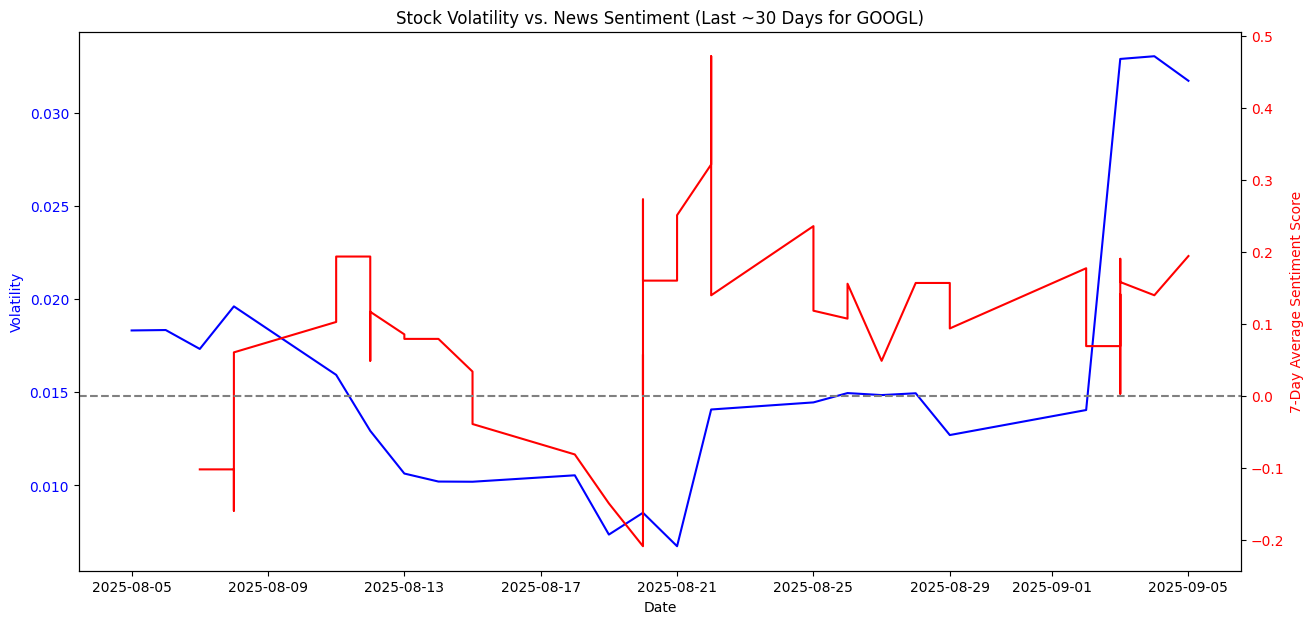

In [39]:
# we will first look into those dates for which we have news data.
# Pehle news ki pehli date nikalte hain.
first_news_date = daily_sentiment['date'].min()

# Now we filter our merged data from this date.
zoomed_df = merged_data[merged_data['Date'] >= first_news_date].copy()


# Smooth the Sentiment Score
# we will use 7-day rolling average to smooth the sentiment score.
zoomed_df['sentiment_smoothed'] = zoomed_df['sentiment_score'].rolling(window=7).mean()


# We will create a new, chart.

fig, ax1 = plt.subplots(figsize=(15, 7))

# We will use 'zoomed_df' for X-axis now.
ax1.plot(zoomed_df['Date'], zoomed_df['volatility'], color='blue', label='Volatility')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second Y-axis for Sentiment Score
ax2 = ax1.twinx()

# We will use the new 'sentiment_smoothed' instead of original 'sentiment_score' for Y-axis.
ax2.plot(zoomed_df['Date'], zoomed_df['sentiment_smoothed'], color='red', label='Smoothed Sentiment')
ax2.set_ylabel('7-Day Average Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding horizontal line at y=0 for sentiment score
ax2.axhline(y=0, color='grey', linestyle='--')

plt.title(f'Stock Volatility vs. News Sentiment (Last ~30 Days for {ticker_symbol})')
plt.show()

1. The Blue line(Volatility) gives us the risk factor. When Blue line goes up it means there is lot of movement in the stock and the risk is increasing.And when blue line goes down it means there is less movement in stock and the risk is less.

2. The Red line(Sentiment Score) gives us the market mood. When Red line goes above the dashed line it means the news is positive and people are optimistic about the stock. And when Red line goes below the dashed line it means the news is negative and people are pessimistic about the stock.

3. When both lines move in same direction then it is easy to predict stock movement. But when both lines move in opposite direction then it is difficult to predict stock movement.



Key Observations : 
1. Observation A (August 13 to August 20):
   - Red Line (Sentiment): During this period, the red line keeps going down. It even goes below 0.0, which means the news sentiment was turning negative.
   - Blue Line (Volatility): Interestingly, during the same period, the blue line was also going down and reached its lowest point.
   - Meaning: Even though the news sentiment was getting more negative, the stock’s volatility was actually decreasing — the market was calming down.

2. Observation B (Around August 21):
   - Red Line (Sentiment): Suddenly, the red line spikes sharply upward, showing that a very strong positive news event occurred.
   - Blue Line (Volatility): At the same time, the blue line, which had been at its lowest, also started rising quickly.
   - Meaning: As soon as sentiment turned strongly positive, the stock’s volatility also began to rise.

3. Observation C (After September 1):
   - Red Line (Sentiment): Sentiment stayed mostly positive during this period.
   - Blue Line (Volatility): Meanwhile, the blue line reached its highest point, meaning the stock experienced the most volatility during this time.
   - Meaning: The peak volatility happened during a phase of positive sentiment.


--- Correlation Analysis (on Filtered Data) ---
                 volatility  sentiment_score
volatility         1.000000         0.006434
sentiment_score    0.006434         1.000000


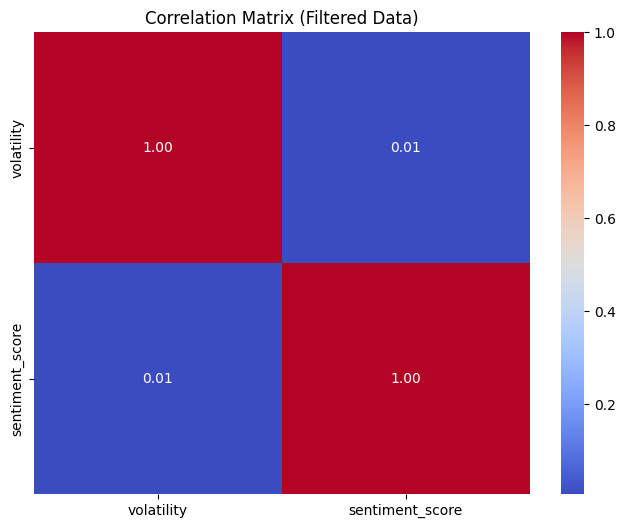

In [40]:
# Correlation Analysis (on Filtered Data)
print("\n--- Correlation Analysis (on Filtered Data) ---")

# Now we will calculate correlation matrix for volatility and sentiment_score using zoomed_df.
correlation_matrix = zoomed_df[['volatility', 'sentiment_score']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Filtered Data)')
plt.show()

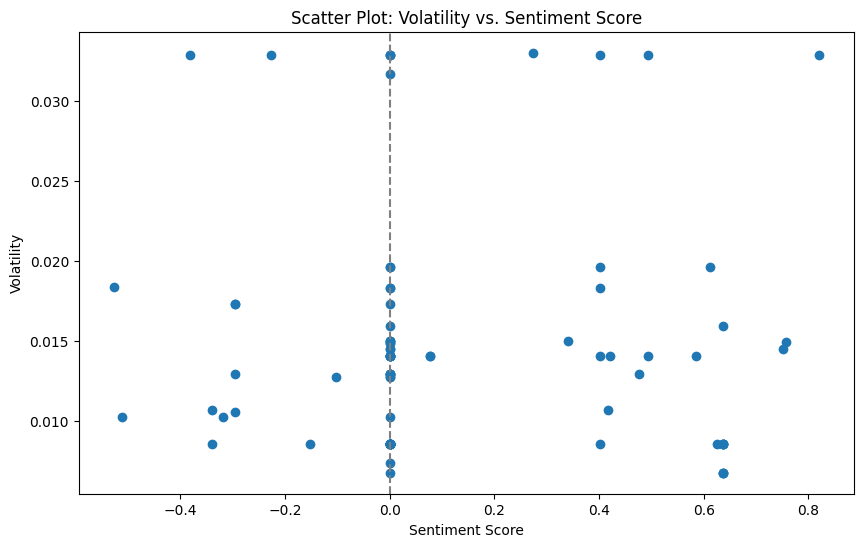

In [41]:
# For more better understanding of the data we will use scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(zoomed_df['sentiment_score'], zoomed_df['volatility'])
plt.title('Scatter Plot: Volatility vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Volatility')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

Each dot in this scatter plot represent a day.
Key Observations :
1. The Neutral Wall (Sentiment = 0)
   - Dashed line shows neutral news i.e. no positive and negative aspects of news.
   - When news was neutral then the volatility can be anything (less, medium or high).

2. The Negative Sentiment Zone (Sentiment < 0)
   - In this zone the dots are in the lowest part of volatility, there are very less dots in higher volatility reason.
   - When the news was negative, the stock movement was always less. When bad news came, there was peace in the market instead of fear.

3. The Positive Sentiment Zone (Sentiment > 0)
   - Here the dots are spread across the entire graph – at the bottom, in the middle, and at the top.
   - The highest points in the  graph (where volatility is more than 0.03) are all in this positive zone only.
   - Small movements can happen at any time, but the maximum movement (highest risk) always happened when the mood of the news was positive.

This chart clearly shows that the relationship between sentiment and volatility is not linear. It is not that if sentiment increases a little then volatility also increases a little.

The relationship is as follows:

"Positive sentiment is a pre-condition for high volatility, but not a guarantee."

- If you want to see high volatility in a stock, then it is important that the news is positive. There is no big volatility during negative or neutral news.
- But, if the news is positive, there is no guarantee that there will be any movement. The market may remain calm.
- So, positive news opens the door for high volatility. Negative news keeps that door closed.

Now we will also see the better correlation called Spearman's Rank Correlation. It can easily grasp non-linear relation

In [42]:
spearman_corr = zoomed_df[['volatility', 'sentiment_score']].corr(method='spearman')
print("--- Spearman Rank Correlation ---")
print(spearman_corr)

--- Spearman Rank Correlation ---
                 volatility  sentiment_score
volatility         1.000000        -0.013078
sentiment_score   -0.013078         1.000000


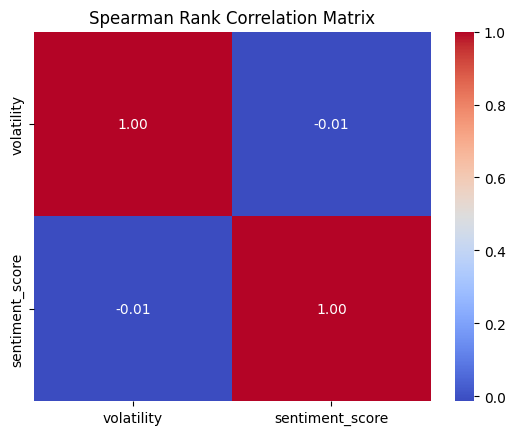

In [43]:
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Matrix')
plt.show()

The Direct Answer:
Spearman correlation -0.01 (which is the rounded version of -0.013078) is very close to 0.

This simply means that there is no consistent monotonic relationship between volatility and sentiment_score.

In simple words:
It is not at all like this that whenever the rank of sentiment increases (news is positive), the rank of volatility always increases. And it is not the opposite either. There is no consistent pattern between the ranks of both.

Now we will use Time lag : It is not necessary that the market reacts on the day the news comes. It is possible that the news comes today and its effect is seen on tomorrow or the person's volatility. This is called time lag.

In [45]:
df_lagged = zoomed_df.copy()
df_lagged['sentiment_lag_1'] = df_lagged['sentiment_score'].shift(1)
df_lagged['sentiment_lag_2'] = df_lagged['sentiment_score'].shift(2)
df_lagged['sentiment_lag_3'] = df_lagged['sentiment_score'].shift(3)

lag_corr = df_lagged[['volatility', 'sentiment_score', 'sentiment_lag_1', 'sentiment_lag_2', 'sentiment_lag_3']].corr()
print("--- Lagged Correlation Matrix ---")
print(lag_corr.loc['volatility'])

--- Lagged Correlation Matrix ---
volatility         1.000000
sentiment_score    0.006434
sentiment_lag_1   -0.000049
sentiment_lag_2    0.000850
sentiment_lag_3    0.033940
Name: volatility, dtype: float64


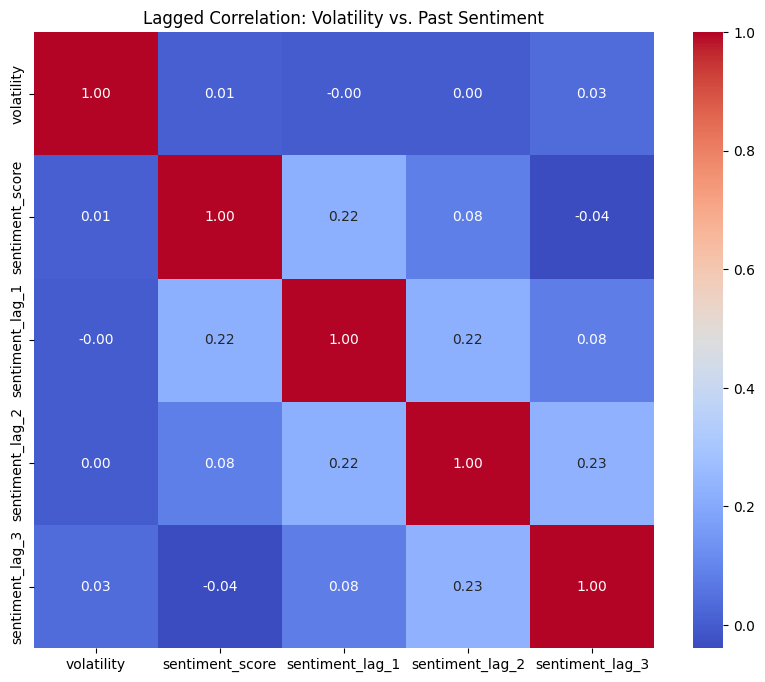

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(lag_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Lagged Correlation: Volatility vs. Past Sentiment')
plt.show()

# Conclusion

Analysis of the Relationship Between News Sentiment and Stock Volatility

The initial objective was to test whether news sentiment and stock market volatility are correlated.

1. Correlation Analysis

  - A Pearson correlation was performed first, which yielded values close to zero, indicating no strong linear relationship.

  - To check for potential non-linear effects, a Spearman correlation was conducted. The results were again close to zero, reinforcing the absence of a monotonic relationship.

2. Lagged Correlation Analysis

  - To investigate whether sentiment influences volatility with a time delay, lagged correlations were computed for up to three previous days. These results also showed near-zero correlations, suggesting no delayed linear effect.

3. Key Insight from Visual Analysis

  - These statistical “failures” highlighted that the relationship is not continuous or linear.

  - Scatter plot analysis revealed that high volatility events occur almost exclusively in the presence of strong positive sentiment.

This indicates that sentiment does not predict volatility directly, but it creates the necessary conditions under which volatility spikes are more likely to occur.